In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

def micro_converter(s):
    hours = int(s[:2])
    minutes = int(s[3:5])
    seconds = int(s[6:8])
    micros = int(s[9:])
    return micros + seconds * 1000000 + minutes * 60 * 1000000 + hours * 60 * 60 * 1000000

dataset = pd.read_csv("lab04-timeseq.dat", sep=" ", names=["timestamp", "seq"], dtype={"seq": np.int32}, converters={"timestamp": micro_converter})
vals_250 = dataset.loc[dataset["timestamp"] < 250000]
dataset_seconds = dataset.copy()
dataset_seconds["timestamp"] = dataset_seconds["timestamp"].astype('float64')
dataset_seconds["timestamp"] = dataset_seconds["timestamp"] / 1000000
vals_250_millis = vals_250.copy()
vals_250_millis["timestamp"] = vals_250_millis["timestamp"].astype('float64')
vals_250_millis["timestamp"] = vals_250_millis["timestamp"] / 1000

print(dataset.dtypes)
print(dataset_seconds.dtypes)
print(dataset_seconds)

timestamp    int64
seq          int32
dtype: object
timestamp    float64
seq            int32
dtype: object
      timestamp      seq
0      0.093456     1389
1      0.099310     2777
2      0.099315     4165
3      0.099317     5553
4      0.099319     6941
...         ...      ...
1500   0.902360  2083389
1501   0.902364  2084777
1502   0.902366  2086165
1503   0.902367  2087553
1504   0.902369  2088140

[1505 rows x 2 columns]


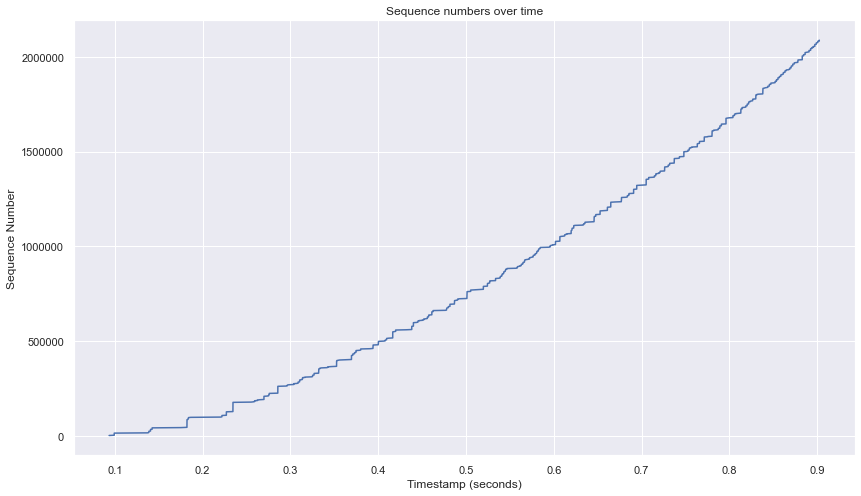

In [23]:
# Line plot 1
sns.set_theme()
plt.figure(figsize=(14, 8))
sns.lineplot(data=dataset_seconds, x="timestamp", y="seq", markers=True).set_title("Sequence numbers over time")
plt.xlabel("Timestamp (seconds)")
plt.ylabel("Sequence Number")
plt.ticklabel_format(axis="y", style="plain")

Text(0, 0.5, 'Sequence Number')

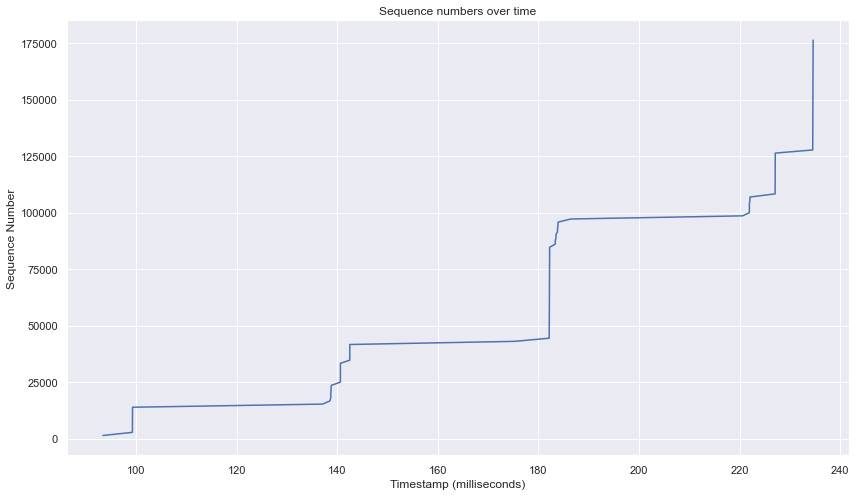

In [24]:
sns.set_theme()
plt.figure(figsize=(14, 8))
sns.lineplot(data=vals_250_millis, x="timestamp", y="seq", markers=True).set_title("Sequence numbers over time")
plt.xlabel("Timestamp (milliseconds)")
plt.ylabel("Sequence Number")